In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('../Datasets/oversampled_data.csv')
data.head()

,Unnamed: 0,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [8]:
data.shape

(5700, 20)

In [9]:
data.isna().sum()

Unnamed: 0                0
account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [10]:
data.dtypes

Unnamed: 0                  int64
account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [11]:
del data['Unnamed: 0']

In [12]:
data.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [13]:
std_sclr = StandardScaler()

In [14]:
X = data.drop(labels='churn',axis=1)
cols = X.columns
X = pd.DataFrame(std_sclr.fit_transform(X))
X.columns = cols
y = data[['churn']]
X.shape,y.shape

((5700, 18), (5700, 1))

In [15]:
rf_model = RandomForestClassifier()

In [18]:
rf_model.fit(X,y)

RandomForestClassifier()

In [20]:
X.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge'],
      dtype='object')

In [19]:
rf_model.feature_importances_

array([0.02602002, 0.01582729, 0.0267822 , 0.06778468, 0.03364893,
       0.02601452, 0.03339914, 0.16669101, 0.11081248, 0.02728954,
       0.07874331, 0.02360539, 0.03145273, 0.02368116, 0.02533399,
       0.042456  , 0.03676566, 0.20369195])

In [27]:
importances = pd.DataFrame({'features':X.columns,'importance':rf_model.feature_importances_}).sort_values('importance')
importances


,features,importance
1,voice_mail_plan,0.015827
11,evening_calls,0.023605
13,night_calls,0.023681
14,night_charge,0.025334
5,night_mins,0.026015
0,account_length,0.026020
2,voice_mail_messages,0.026782
9,day_calls,0.027290
12,evening_charge,0.031453
6,international_mins,0.033399


<AxesSubplot:>

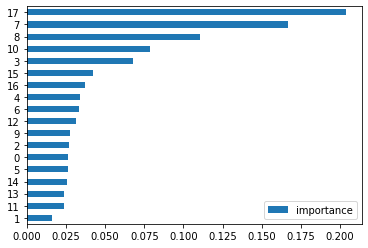

In [29]:
importances.plot(kind='barh')

In [40]:
#Top 10 Features
importances.reset_index(drop=True).tail(10).sort_values('importance')['features']

8             evening_charge
9         international_mins
10              evening_mins
11      international_charge
12       international_calls
13                  day_mins
14                day_charge
15        international_plan
16    customer_service_calls
17              total_charge
Name: features, dtype: object